In [23]:
# import pandas and other libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
#import casual inference libraries
from sklearn.linear_model import LogisticRegression
from causalinference import CausalModel


In [56]:
#get working directory
import os
os.getcwd()
#get csv file from working directory
os.listdir()
#load csv file
data = pd.read_csv('NSICU_database_HDN.csv')
# Define the columns you want to keep
columns_to_keep = ['F','Age','Height','Weight','Early nutrition','EN','Infection','Other','OverAge']

# Filter the DataFrame to only include these columns
data_filtered = data[columns_to_keep]


In [75]:
# Specify your treatment, control (outcome), and covariates
treatment = 'Early nutrition'  # Replace 'treatment_column' with your actual treatment column name
outcome = 'Infection'  # Replace 'outcome_column' with your actual outcome column name
covariates = ['F', 'Other', 'OverAge']  # Update with your actual covariate names



In [76]:
#printing the shape to see dimensions of the data
print(data_filtered.shape)

(1353, 10)


In [77]:
# Fit a logistic regression model to estimate the propensity scores
logit = LogisticRegression()
logit.fit(data_filtered[covariates], data_filtered[treatment])

LogisticRegression()

In [78]:
# Predict the propensity scores
data_filtered['propensity_score'] = logit.predict_proba(data_filtered[covariates])[:,1]

C:\Users\njmik\AppData\Local\Temp\ipykernel_2544\617347179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['propensity_score'] = logit.predict_proba(data_filtered[covariates])[:,1]


In [79]:
# Perform propensity score matching
causal = CausalModel(
    Y=data_filtered[outcome].values, 
    D=data_filtered[treatment].values, 
    X=data_filtered['propensity_score'].values
)

In [80]:
#adjust for biases
causal.est_via_matching(bias_adj=True)  

C:\Users\njmik\AppData\Roaming\Python\Python311\site-packages\causalinference\estimators\matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef



Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.002      0.017     -0.106      0.915     -0.035      0.031
           ATC     -0.001      0.017     -0.045      0.964     -0.034      0.033
           ATT     -0.004      0.017     -0.261      0.794     -0.037      0.028



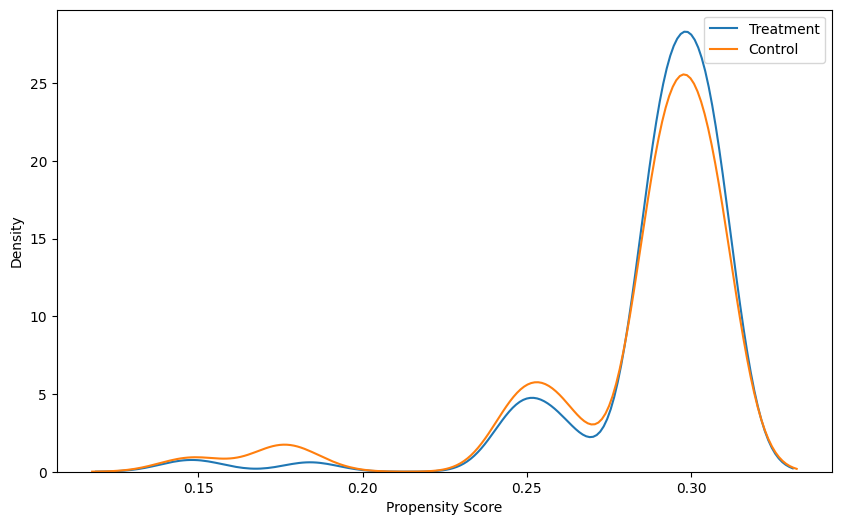

In [81]:
# Print the estimated Average Treatment Effect (ATE)
print(causal.estimates) 
# Plot the propensity scores
plt.figure(figsize=(10, 6))
sns.kdeplot(data_filtered[data_filtered[treatment] == 1]['propensity_score'], label='Treatment')
sns.kdeplot(data_filtered[data_filtered[treatment] == 0]['propensity_score'], label='Control')
plt.xlabel('Propensity Score')
plt.ylabel('Density')
#put in a legend
plt.legend()
plt.show()

In [38]:
from sklearn.linear_model import LogisticRegression


In [84]:
# Specify your treatment, control (outcome), and covariates
treatment = 'Early nutrition'  # Replace 'treatment_column' with your actual treatment column name
outcome = 'Infection'  # Replace 'outcome_column' with your actual outcome column name
covariates = ['F', 'Other', 'OverAge']  # Update with your actual covariate names


In [66]:
# Initialize the logistic regression model
logit = LogisticRegression()

# Fit the model with your covariates and binary treatment indicator
logit.fit(data[covariates], data[treatment])

# Predict propensity scores using the logistic regression model
data['propensity_score'] = logit.predict_proba(data[covariates])[:, 1]

# Define 'propensity_score' as a variable
propensity_score = data['propensity_score']

#print summary of propensity_score, outcome, and treatment, and covariates including mean, std, p-value, and 95% confidence interval
print(causal_model.summary_stats)




Summary Statistics

                       Controls (N_c=969)         Treated (N_t=384)             
       Variable         Mean         S.d.         Mean         S.d.     Raw-diff
--------------------------------------------------------------------------------
              Y        0.085        0.278        0.083        0.277       -0.001

                       Controls (N_c=969)         Treated (N_t=384)             
       Variable         Mean         S.d.         Mean         S.d.     Nor-diff
--------------------------------------------------------------------------------
             X0        0.472        0.499        0.492        0.501        0.041
             X1        0.934        0.248        0.969        0.174        0.162
             X2        0.813        0.390        0.852        0.356        0.103



In [41]:
import statsmodels.api as sm

In [62]:
# Add a constant term to the independent variables for the intercept
X = sm.add_constant(data[covariates])
y = data[outcome]

In [43]:
# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the model
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:              Infection   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     6.683
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           0.000177
Time:                        14:03:10   Log-Likelihood:                -176.72
No. Observations:                1353   AIC:                             361.4
Df Residuals:                    1349   BIC:                             382.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0119      0.034      0.344      0.7